In [ ]:
# Data Set: World-Development-Indicators

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Mini Project <br></p><br>
## Ratio of Birth Rate to Death Rate for Top 5 countries with highest C02 emissions in 2010

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### What is the shape of dataset?

In [3]:
data = pd.read_csv('./Indicators.csv')
data.shape

(5656458, 6)

### Finding out Top 5 countries with highest CO2 emission for year 2010

In [4]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2010

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

co2_2010 = data[mask1 & mask2]
co2_top5 = co2_2010.sort_values(['Value'],ascending=False).head()
co2_top5

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4982884,Qatar,QAT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,42.639076
5010994,Trinidad and Tobago,TTO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,38.337841
4941965,Kuwait,KWT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,29.693433
4868476,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,24.182702
4883411,Brunei Darussalam,BRN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,21.873222


### Storing countries into a list

In [5]:
l1 = co2_top5['CountryName'].unique().tolist()
l1

['Qatar', 'Trinidad and Tobago', 'Kuwait', 'Aruba', 'Brunei Darussalam']

### Death Rate and Birth Rate for Top 5 countries with CO2 emissions

In [6]:
death_rate = pd.DataFrame()
birth_rate = pd.DataFrame()

for i in l1:
    hist_indi_death = 'Death rate,'
    hist_indi_birth = 'Birth rate,'
    
    mask1 = data['IndicatorName'].str.contains(hist_indi_death)
    mask2 = data['Year'].isin([hist_year])
    mask3 = data['CountryName'].str.contains(i)
    mask4 = data['IndicatorName'].str.contains(hist_indi_birth)
    
    
    death_rate=death_rate.append(data[mask1 & mask2 & mask3])
    birth_rate=birth_rate.append(data[mask4 & mask2 & mask3])

In [7]:
death_rate

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4982912,Qatar,QAT,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2010,1.554
5011031,Trinidad and Tobago,TTO,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2010,9.046
4942000,Kuwait,KWT,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2010,2.983
4868497,Aruba,ABW,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2010,7.905
4883434,Brunei Darussalam,BRN,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2010,2.994


In [8]:
birth_rate

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4982860,Qatar,QAT,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2010,12.223
5010973,Trinidad and Tobago,TTO,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2010,15.199
4941943,Kuwait,KWT,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2010,21.314
4868472,Aruba,ABW,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2010,10.823
4883386,Brunei Darussalam,BRN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2010,17.499


### List of Birth Rate to Death Rate according to the top 5 countries

In [10]:
l2=[]
for i in range(0,5):
    l2.append(birth_rate.iloc[i]['Value']/death_rate.iloc[i]['Value'])

l2

[7.865508365508364,
 1.6801901392880834,
 7.14515588333892,
 1.3691334598355471,
 5.844689378757516]

### Visualisation of the Birth Rate to Death Rate for Top 5 countries with highest CO2 Emissions in 2010

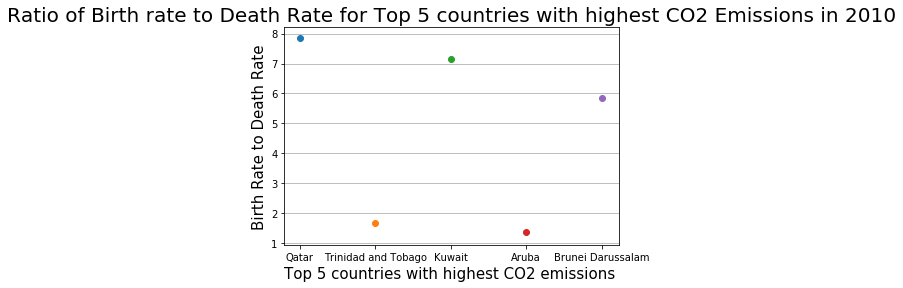

In [11]:
fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('Ratio of Birth rate to Death Rate for Top 5 countries with highest CO2 Emissions in 2010',fontsize=20)
axis.set_xlabel('Top 5 countries with highest CO2 emissions ',fontsize=15)
axis.set_ylabel('Birth Rate to Death Rate',fontsize=15)

for i in range(0,5):
    x=l1[i]
    y=l2[i]

    axis.scatter(x,y)

plt.show()